# EDA (Exploratory Data Analysis) del dataset de los viajes de los taxis For-Hire durante el mes de septiembre de 2024

# Paso 0: Importar librerias necesarias para el EDA y cargar el dataset que será analizado.

In [38]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

* Pandas y NumPy para el manejo de la data.
* Matplotlib y seaborn para la visualizacion de los gráficos pertinentes.
* Warnings para legibilidad del código y visualizaciones.

In [39]:
fhv_tripdata_sample = pd.read_parquet('../Datasets/fhv_tripdata_2024-09.parquet')
fhv_tripdata_sample.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00014,2024-09-01 00:10:00,2024-09-01 01:31:00,NaN,NaN,NaN,B00014
1,B00112,2024-09-01 00:50:52,2024-09-01 00:50:59,NaN,210.0,NaN,B00112
2,B00112,2024-09-01 00:26:33,2024-09-01 00:52:31,NaN,14.0,NaN,B00112
3,B00112,2024-09-01 00:59:52,2024-09-01 01:06:07,NaN,14.0,NaN,B00112
4,B00225,2024-09-01 00:53:25,2024-09-01 00:58:40,NaN,4.0,NaN,B03404


# Paso 1: Exploracion de los datos
* valores erróneos
* valores nulos
* valores duplicados
* valores faltantes

In [40]:
fhv_tripdata_sample.shape

(1718375, 7)

El dataset contiene 1.718.375 filas, que representan los viajes realizados durante el mes de septiembre de 2024, y 7 columnas

In [41]:
fhv_tripdata_sample.columns.tolist()

['dispatching_base_num',
 'pickup_datetime',
 'dropOff_datetime',
 'PUlocationID',
 'DOlocationID',
 'SR_Flag',
 'Affiliated_base_number']

En líneas generales, la informacion en las columnas de este dataset contienen lo siguiente:

* Número o identificador de la base desde la cual se despachó el vehículo. (dispatching_base_num)
* Fecha y hora en que el vehículo recogió al pasajero. (pickup_datetime)
* Fecha y hora en que el pasajero fue dejado en su destino. (dropOff_datetime)
* Identificador de la ubicación donde se recogió al pasajero. (PUlocationID)
* Identificador de la ubicación donde se dejó al pasajero.DOlocationID
* Indicador binario o categórico que podría denotar algún atributo especial del viaje (SR_Flag)
*  Número o identificador de la base afiliada al vehículo (Affiliated_base_number)

En resumen, se evidencia que el dataset contiene informacion sobre los viajes realizados en el mes de septiembre de 2024 que incluyen principalmente tiempo y ubicaciones. 

In [42]:
fhv_tripdata_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718375 entries, 0 to 1718374
Data columns (total 7 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   dispatching_base_num    object        
 1   pickup_datetime         datetime64[us]
 2   dropOff_datetime        datetime64[us]
 3   PUlocationID            float64       
 4   DOlocationID            float64       
 5   SR_Flag                 float64       
 6   Affiliated_base_number  object        
dtypes: datetime64[us](2), float64(3), object(2)
memory usage: 91.8+ MB


In [43]:
(fhv_tripdata_sample['dispatching_base_num'].nunique())

378

Aquí se puede observar que el tipo de dato es acorde a la informacion que posee.

A continuación se ordenara la data de acuerdo a la hora y fecha que comienza el viaje

In [44]:
fhv_tripdata_sample.sort_values(by=['pickup_datetime'])

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
268,B00887,2024-09-01 00:00:02,2024-09-01 00:46:32,NaN,87.0,NaN,B02465
910,B02855,2024-09-01 00:00:03,2024-09-01 00:38:01,NaN,61.0,NaN,B03404
869,B02563,2024-09-01 00:00:05,2024-09-01 00:01:37,NaN,198.0,NaN,B02563
637,B01381,2024-09-01 00:00:06,2024-09-01 00:04:29,NaN,7.0,NaN,B03404
1091,B03380,2024-09-01 00:00:06,2024-09-01 00:20:48,142.0,144.0,NaN,B03404
...,...,...,...,...,...,...,...
1718217,B03266,2024-09-30 23:59:36,2024-10-01 00:06:14,7.0,7.0,NaN,B03266
1717907,B01381,2024-09-30 23:59:37,2024-10-01 00:05:14,NaN,216.0,NaN,B03404
1717771,B01312,2024-09-30 23:59:43,2024-10-01 00:07:54,NaN,217.0,NaN,B03505
1717968,B01536,2024-09-30 23:59:49,2024-10-01 00:11:34,NaN,254.0,NaN,B03404


Se observa que el dataset tiene un valor inesperado, que corresponden a un mes que no es septiembre. A continuación se observará en mayor detalle estos valores.

In [45]:
fhv_tripdata_sample[fhv_tripdata_sample['dropOff_datetime'].dt.month!=9]

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
769449,B03256,2024-09-14 12:13:00,2024-10-04 12:30:00,220.0,200.0,NaN,B03256
1010357,B03113,2024-09-18 14:21:55,2024-10-03 12:42:00,171.0,116.0,NaN,B03113
1299410,B03156,2024-09-23 16:21:00,2024-10-06 11:42:00,168.0,159.0,NaN,B03156
1348903,B02550,2024-09-24 13:38:33,2024-10-24 14:00:15,NaN,163.0,NaN,B03404
1514103,B03320,2024-09-27 07:16:00,2024-10-01 00:09:00,161.0,138.0,NaN,B03404
...,...,...,...,...,...,...,...
1718368,B03524,2024-09-30 23:38:46,2024-10-01 00:07:26,NaN,NaN,NaN,B02243
1718369,B03524,2024-09-30 23:51:44,2024-10-01 00:06:16,NaN,NaN,NaN,B03404
1718372,B03524,2024-09-30 23:38:21,2024-10-01 00:13:15,NaN,NaN,NaN,B03404
1718373,B03618,2024-09-30 23:25:00,2024-10-01 00:02:00,NaN,NaN,NaN,B03618


En este caso los valores que no son del mes de septiembre son de viajes minutos despues ( primeros viajes de octubre). Como pertenecen a los extremos del rango de tiempo utilizado, se conservarán.

Tambien se observa que hay algunos valores que no corresponden al rango de tiempo de un viaje normal en la ciudad de nueva york, por lo que se procedera a elimninar.


In [46]:
# Definir el rango válido de fechas
start_date = '2024-09-01 00:00:00'
end_date = '2024-10-01 05:59:59'  # Permitir viajes hasta la madrugada del 1 de octubre

# Filtrar registros fuera del rango
extreme_times = fhv_tripdata_sample[(fhv_tripdata_sample['dropOff_datetime'] < start_date) | (fhv_tripdata_sample['dropOff_datetime'] > end_date)]
print(extreme_times)


        dispatching_base_num     pickup_datetime    dropOff_datetime  \
769449                B03256 2024-09-14 12:13:00 2024-10-04 12:30:00   
1010357               B03113 2024-09-18 14:21:55 2024-10-03 12:42:00   
1299410               B03156 2024-09-23 16:21:00 2024-10-06 11:42:00   
1348903               B02550 2024-09-24 13:38:33 2024-10-24 14:00:15   
1571046               B02990 2024-09-28 01:18:00 2024-10-10 10:00:20   
1637972               B03320 2024-09-29 13:24:00 2024-10-01 11:49:00   
1700268               B00972 2024-09-30 15:08:26 2024-10-01 06:31:56   
1713069               B03296 2024-09-30 19:52:28 2024-10-01 08:03:37   
1718061               B02416 2024-09-30 23:40:47 2024-10-01 23:53:06   
1718062               B02416 2024-09-30 23:02:48 2024-10-01 23:20:00   
1718063               B02416 2024-09-30 23:20:25 2024-10-01 23:43:35   

         PUlocationID  DOlocationID  SR_Flag Affiliated_base_number  
769449          220.0         200.0      NaN                 B032

In [47]:
# Eliminar los viajes con tiempos extremos
fhv_tripdata_sample = fhv_tripdata_sample[(fhv_tripdata_sample['dropOff_datetime'] >= start_date) & (fhv_tripdata_sample['dropOff_datetime'] <= end_date)]


In [48]:
fhv_tripdata_sample[fhv_tripdata_sample['dropOff_datetime'].dt.month!=9]

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
1514103,B03320,2024-09-27 07:16:00,2024-10-01 00:09:00,161.0,138.0,NaN,B03404
1689435,B02677,2024-09-30 12:08:13,2024-10-01 05:44:58,NaN,150.0,NaN,B03404
1702248,B02930,2024-09-30 15:16:00,2024-10-01 05:38:13,NaN,265.0,NaN,B02930
1703348,B00078,2024-09-30 16:45:00,2024-10-01 02:50:00,NaN,NaN,NaN,B00078
1710203,B01349,2024-09-30 18:17:00,2024-10-01 00:15:00,NaN,NaN,NaN,B01349
...,...,...,...,...,...,...,...
1718368,B03524,2024-09-30 23:38:46,2024-10-01 00:07:26,NaN,NaN,NaN,B02243
1718369,B03524,2024-09-30 23:51:44,2024-10-01 00:06:16,NaN,NaN,NaN,B03404
1718372,B03524,2024-09-30 23:38:21,2024-10-01 00:13:15,NaN,NaN,NaN,B03404
1718373,B03618,2024-09-30 23:25:00,2024-10-01 00:02:00,NaN,NaN,NaN,B03618


In [49]:
fhv_tripdata_sample.isnull().sum()

dispatching_base_num            0
pickup_datetime                 0
dropOff_datetime                0
PUlocationID              1319267
DOlocationID               321818
SR_Flag                   1718364
Affiliated_base_number          0
dtype: int64

Aca se observa el numero de valores nulos encontrados por cada columna. Tenemos que:

* Solo hay valores nulos en las columnas correspondientes al identificador de la ubicacion donde se recogio y donde se dejo e indicador binario.
* Para el resto de columnas no hay valores nulos.
* El numero de valores nulos en las columnas mencionadas no es el mismo. 

In [50]:
fhv_tripdata_sample[fhv_tripdata_sample['SR_Flag'].isnull()]

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00014,2024-09-01 00:10:00,2024-09-01 01:31:00,NaN,NaN,NaN,B00014
1,B00112,2024-09-01 00:50:52,2024-09-01 00:50:59,NaN,210.0,NaN,B00112
2,B00112,2024-09-01 00:26:33,2024-09-01 00:52:31,NaN,14.0,NaN,B00112
3,B00112,2024-09-01 00:59:52,2024-09-01 01:06:07,NaN,14.0,NaN,B00112
4,B00225,2024-09-01 00:53:25,2024-09-01 00:58:40,NaN,4.0,NaN,B03404
...,...,...,...,...,...,...,...
1718370,B03524,2024-09-30 23:24:49,2024-09-30 23:36:05,NaN,NaN,NaN,B03404
1718371,B03524,2024-09-30 23:02:53,2024-09-30 23:26:55,NaN,NaN,NaN,B03404
1718372,B03524,2024-09-30 23:38:21,2024-10-01 00:13:15,NaN,NaN,NaN,B03404
1718373,B03618,2024-09-30 23:25:00,2024-10-01 00:02:00,NaN,NaN,NaN,B03618


Se procedera a eliminar la columna SR_Flag ya que solo contiene valores nulos.

In [51]:
fhv_tripdata_sample.drop(columns=['SR_Flag'], inplace=True)


Debido a que las columna PUlocationID contiene una gran parte de datos nulos se procedera a eliminar ya que los datos no son completos y puede generar errores mas adelante en el proyecto. 

In [52]:
fhv_tripdata_sample.drop(columns=['PUlocationID'], inplace=True)

In [53]:
fhv_tripdata_sample

,dispatching_base_num,pickup_datetime,dropOff_datetime,DOlocationID,Affiliated_base_number
0,B00014,2024-09-01 00:10:00,2024-09-01 01:31:00,NaN,B00014
1,B00112,2024-09-01 00:50:52,2024-09-01 00:50:59,210.0,B00112
2,B00112,2024-09-01 00:26:33,2024-09-01 00:52:31,14.0,B00112
3,B00112,2024-09-01 00:59:52,2024-09-01 01:06:07,14.0,B00112
4,B00225,2024-09-01 00:53:25,2024-09-01 00:58:40,4.0,B03404
...,...,...,...,...,...
1718370,B03524,2024-09-30 23:24:49,2024-09-30 23:36:05,NaN,B03404
1718371,B03524,2024-09-30 23:02:53,2024-09-30 23:26:55,NaN,B03404
1718372,B03524,2024-09-30 23:38:21,2024-10-01 00:13:15,NaN,B03404
1718373,B03618,2024-09-30 23:25:00,2024-10-01 00:02:00,NaN,B03618


Analizando bien la columna DOlocationID se encuentra tambien con valores nulos lo cual puede sesgar el analisis mas adelate, Por lo tanto se procedera a eliminar. 

In [54]:
fhv_tripdata_sample.drop(columns=['DOlocationID'], inplace=True)

In [55]:
fhv_tripdata_sample

,dispatching_base_num,pickup_datetime,dropOff_datetime,Affiliated_base_number
0,B00014,2024-09-01 00:10:00,2024-09-01 01:31:00,B00014
1,B00112,2024-09-01 00:50:52,2024-09-01 00:50:59,B00112
2,B00112,2024-09-01 00:26:33,2024-09-01 00:52:31,B00112
3,B00112,2024-09-01 00:59:52,2024-09-01 01:06:07,B00112
4,B00225,2024-09-01 00:53:25,2024-09-01 00:58:40,B03404
...,...,...,...,...
1718370,B03524,2024-09-30 23:24:49,2024-09-30 23:36:05,B03404
1718371,B03524,2024-09-30 23:02:53,2024-09-30 23:26:55,B03404
1718372,B03524,2024-09-30 23:38:21,2024-10-01 00:13:15,B03404
1718373,B03618,2024-09-30 23:25:00,2024-10-01 00:02:00,B03618


# EDA (Exploratory Data Analysis) REPORTE

* Se encuentra que las columnas de la fecha y hora en el que se recogio y dejo el cliente se encuentran en buen estado y con posibilidad de uso en el proyecto. Se estima que la calidad de estos datos es de 100%

* Sin embargo se encuentra que de las 7 columnas con las que se inicio, se hizo el respectivo analisis de valores nulos,  y se encuentra que una columna (SR_Flag) es totalmente nula, las demas columas que es la ubicacion en la que se recogio y dejo el cliente, no cuenta en su totalidad con los datos, por lo que puede presentar problemas en un futuro. Por tal razon se eliminaron del dataset.

In [59]:
# Calcular completitud
def calculate_quality(fhv_tripdata_sample):
    quality_scores = {}

    # Completitud: proporción de valores no nulos
    completeness = fhv_tripdata_sample.notnull().mean()

    # Validez y consistencia según reglas específicas para cada columna
    # Ejemplo: pickup_datetime y dropOff_datetime
    valid_dates = (fhv_tripdata_sample['dropOff_datetime'] > fhv_tripdata_sample['pickup_datetime']).mean()
    
    # Ejemplo: dispatching_base_num y Affiliated_base_number
    valid_base_num = fhv_tripdata_sample['dispatching_base_num'].str.isalnum().mean()
    valid_affiliated_base = fhv_tripdata_sample['Affiliated_base_number'].str.isalnum().mean()

    # Calcular la calidad de cada columna
    quality_scores['pickup_datetime'] = completeness['pickup_datetime'] * valid_dates
    quality_scores['dropOff_datetime'] = completeness['dropOff_datetime'] * valid_dates
    quality_scores['dispatching_base_num'] = completeness['dispatching_base_num'] * valid_base_num
    quality_scores['Affiliated_base_number'] = completeness['Affiliated_base_number'] * valid_affiliated_base

    # Calcular el promedio de calidad general
    overall_quality = sum(quality_scores.values()) / len(quality_scores)
    
    return quality_scores, overall_quality


In [60]:
quality_scores, overall_quality = calculate_quality(fhv_tripdata_sample)
print("Calidad por columna:", quality_scores)
print("Calidad general del dataset:", overall_quality * 100, "%")


Calidad por columna: {'pickup_datetime': 1.0, 'dropOff_datetime': 1.0, 'dispatching_base_num': 1.0, 'Affiliated_base_number': 0.9821388250684954}
Calidad general del dataset: 99.55347062671238 %


In [61]:
# Definir el número de columnas originales y restantes
columnas_originales = 7
columnas_restantes = 4

# Calcular el porcentaje de columnas restantes
porcentaje_restante = (columnas_restantes / columnas_originales) * 100

# Mostrar el resultado
print(f"Porcentaje de columnas restantes: {porcentaje_restante:.2f}%")

Porcentaje de columnas restantes: 57.14%


Como no se puede obtener la totalidad de los datos en la columna DOLocation y que es un dato imprescindible para el proyecto, se decide no continuar con este dataset, ya que no proporciona la totalidad de los datos y puede resultar en errores mas adelante.

En este calculo podemos ver que la calidad de los datos en este Dataset es 57.14%. 

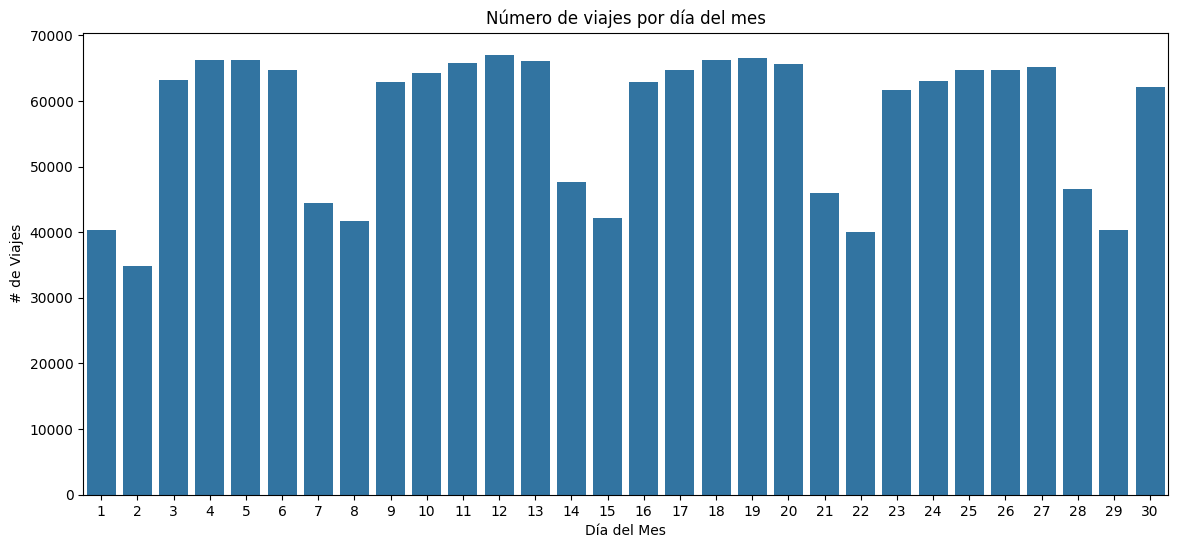

In [56]:
sns.countplot(data=fhv_tripdata_sample,x=fhv_tripdata_sample['pickup_datetime'].dt.day)
plt.rcParams["figure.figsize"] = (14,6)
plt.title('Número de viajes por día del mes') 
plt.xlabel('Día del Mes')
plt.ylabel('# de Viajes')
plt.show()

### Se observa una tendencia oscilante que va acorde con el comportamiento de la cantidad de viajes observado durante los dias de la semana

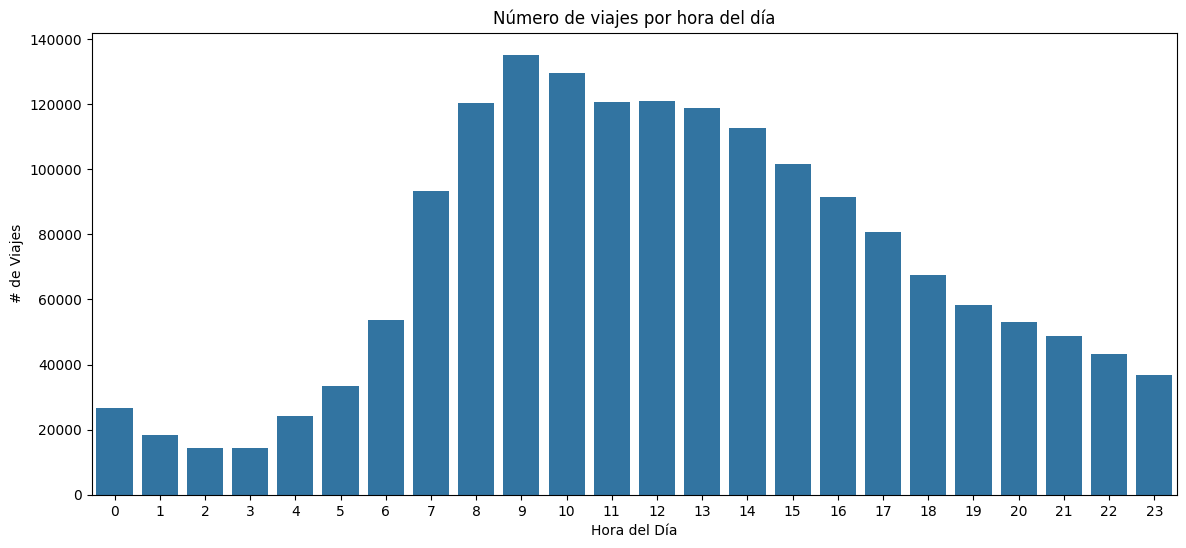

In [57]:
sns.countplot(data=fhv_tripdata_sample,x=fhv_tripdata_sample['pickup_datetime'].dt.hour)
plt.title('Número de viajes por hora del día') 
plt.xlabel('Hora del Día')
plt.ylabel('# de Viajes')
plt.show()

# Se evidencia que los viajes en rangos de hora de 12am a 6am son muy bajos. De 7am a 1pm su comportamiento es Ascendente e intenta mantenerse constante pero finalmente los graficos muestran un comportamiento decreciente hasta la ultima hora del dia.